<a href="https://colab.research.google.com/github/sultanbst123/MachineHack-Loan/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data modelling with python

## Library & File

In [ ]:

!pip install catboost
!pip install optuna
!pip install borutashap

     |████████████████████████████████| 76.3 MB 1.2 MB/s 
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 209 kB 52.3 MB/s 
     |████████████████████████████████| 75 kB 4.6 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 149 kB 54.4 MB/s 
     |████████████████████████████████| 112 kB 58.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=02320589744f74a89281019761281c47eb8b863692697d0b1379bc910d38b89e
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 564 kB 5.1 MB/s 


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from BorutaShap import BorutaShap
 
# classification
import xgboost, lightgbm, catboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, HistGradientBoostingClassifier) 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
 
# regression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                             AdaBoostRegressor, HistGradientBoostingRegressor) 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDOneClassSVM
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Loan /train_loan(clean).csv")
test = pd.read_csv("/content/drive/MyDrive/Loan /test_loan(clean).csv")

In [ ]:
train

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,Debt consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,49,31,311301,6619,0
1,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0
2,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,Debt consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0
3,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0
4,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,69,48,181775,34301,1
67459,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,14,37,22692,8714,0
67460,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,Other,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,137,17,176857,42330,0
67461,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,73,61,361339,39075,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  object 
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Employment Duration           67463 non-null  object 
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

## Split & try

In [ ]:
x = train.drop("Loan Status", axis=1) 
y = train["Loan Status"]

In [ ]:
cater = x.select_dtypes("object").columns

In [ ]:
x[cater] = x[cater].astype("category")

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
lg = LGBMClassifier(is_unbalanced=True,random_state=42)
lg.fit(x_train,y_train)

LGBMClassifier(is_unbalanced=True, random_state=42)

In [ ]:

# accuracy train & validation

lg.score(x_val, y_val), lg.score(x_train, y_train)

(0.9075075965315349, 0.9081156197887715)

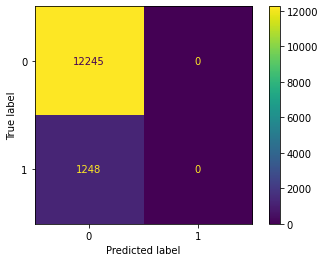

In [ ]:

# confusion matrix
plot_confusion_matrix(lg, x_val, y_val)

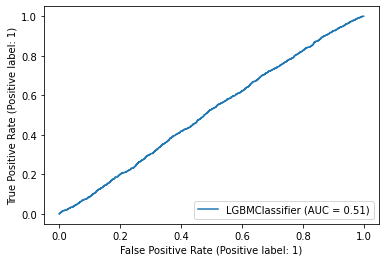

In [ ]:

#roc auc 

plot_roc_curve(lg, x_val, y_val)

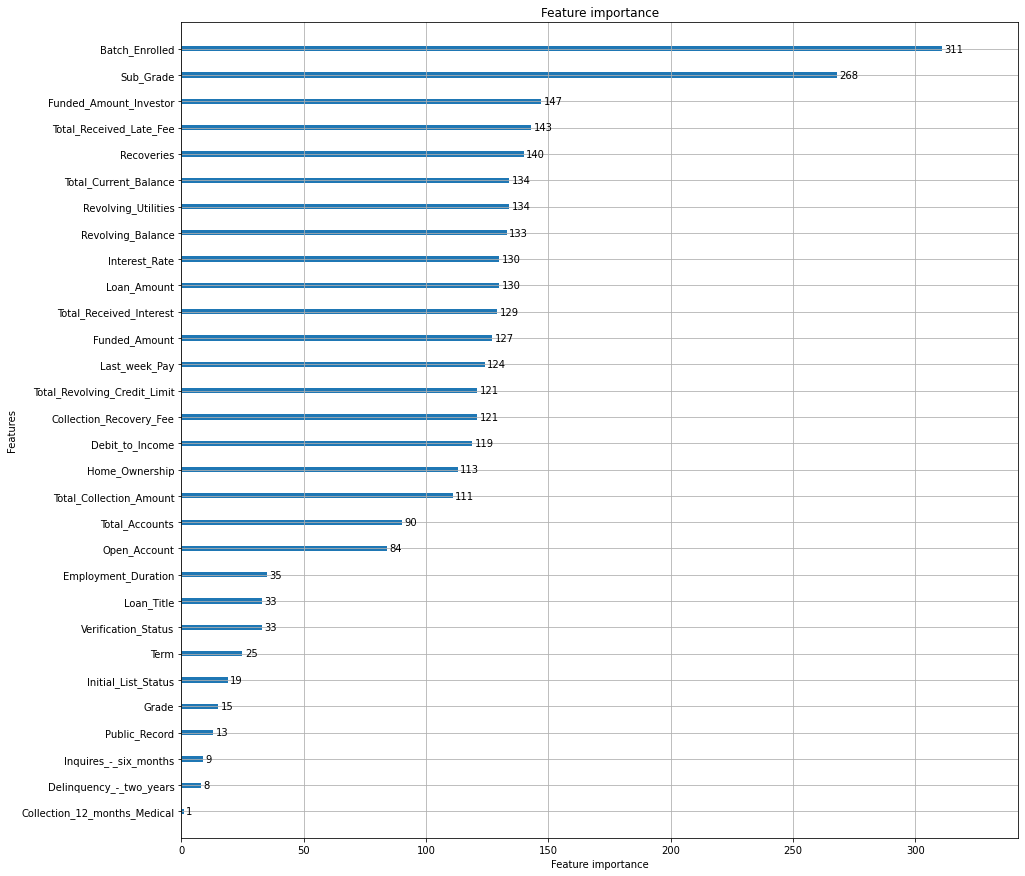

In [ ]:
#fitur penting 

fig, ax = plt.subplots(1, 1,figsize=(15, 15)) 
lightgbm.plot_importance(lg,ax=ax)

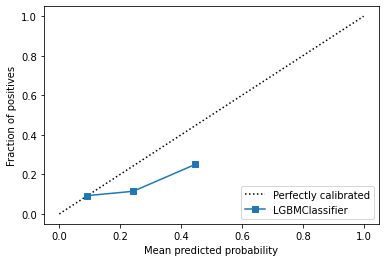

In [ ]:
disp = CalibrationDisplay.from_estimator(lg, x_val, y_val) 
plt.show()

In [ ]:
prob = lg.predict_proba(x_val)

In [ ]:
log_loss(y_val, prob)

0.31280184971573527

## Model - 1

In [ ]:
# hanya fokus ke log loss saja 

loss = []
acc_train = []
acc_val = []

In [ ]:
x_train_1 = x_train.copy() 
x_val_1 = x_val.copy()

In [ ]:
x_train_1.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
33057,34204,9782,8004.331109,58,BAT2833642,10.814736,D,E2,MORTGAGE,59153.22883,Source Verified,Credit card refinancing,12.793406,0,0,11,1,10061,58.479197,16,w,2254.019684,9.787524,8.291792,0.550733,0,58,26,334479,8259
31328,21613,4756,23044.854400,58,BAT1930365,8.723611,C,C4,MORTGAGE,84892.56433,Source Verified,Debt consolidation,30.859936,0,0,13,0,2105,48.061594,28,f,1331.297409,0.068953,4.804714,0.104069,0,147,55,222769,12266
42898,15129,9458,11990.490630,59,BAT1780517,13.495798,D,F5,MORTGAGE,45797.07478,Source Verified,Credit card refinancing,22.967758,0,0,16,0,481,71.456180,26,w,1859.728484,0.447609,0.157478,0.912977,0,16,47,24020,14872
14292,18340,10738,10528.747760,59,BAT4271519,20.681078,A,B3,MORTGAGE,42830.08916,Not Verified,Debt consolidation,13.989950,1,0,9,0,14220,36.979050,26,w,4824.026184,0.060770,0.459109,0.993460,0,15,15007,150891,27883
2393,12141,4722,16786.072140,59,BAT1780517,9.305006,C,C1,MORTGAGE,148207.86970,Verified,Credit card refinancing,15.602785,0,0,19,0,1242,58.161129,20,w,4440.561965,0.030743,4.524671,0.218698,0,99,24,518630,12917


In [ ]:
lc = {}
for i in cater: 
    lc[i] = LabelEncoder() 
    x_train_1[i] = lc[i].fit_transform(x_train_1[i]) 
    x_val_1[i] = lc[i].transform(x_val_1[i])

In [ ]:
x_train_1

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
33057,34204,9782,8004.331109,58,20,10.814736,3,21,0,59153.22883,1,0,12.793406,0,0,11,1,10061,58.479197,16,1,2254.019684,9.787524,8.291792,0.550733,0,58,26,334479,8259
31328,21613,4756,23044.854400,58,8,8.723611,2,13,0,84892.56433,1,1,30.859936,0,0,13,0,2105,48.061594,28,0,1331.297409,0.068953,4.804714,0.104069,0,147,55,222769,12266
42898,15129,9458,11990.490630,59,7,13.495798,3,29,0,45797.07478,1,0,22.967758,0,0,16,0,481,71.456180,26,1,1859.728484,0.447609,0.157478,0.912977,0,16,47,24020,14872
14292,18340,10738,10528.747760,59,27,20.681078,0,7,0,42830.08916,0,1,13.989950,1,0,9,0,14220,36.979050,26,1,4824.026184,0.060770,0.459109,0.993460,0,15,15007,150891,27883
2393,12141,4722,16786.072140,59,7,9.305006,2,10,0,148207.86970,2,0,15.602785,0,0,19,0,1242,58.161129,20,1,4440.561965,0.030743,4.524671,0.218698,0,99,24,518630,12917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15153,29271,20830,15137.149720,58,19,13.414766,2,6,2,82293.97525,2,1,12.324508,0,0,9,0,12992,85.167835,15,1,1043.462972,0.087103,0.148393,0.580363,0,12,42,149551,34829
12304,7470,9043,7876.323309,59,7,16.786600,2,15,0,58292.44141,1,1,25.925771,1,0,14,0,14901,38.341277,19,1,1063.956171,41.976744,3.674140,1.325331,0,72,39,371818,46396
9280,15343,21610,12781.771910,58,33,5.718919,0,7,2,40589.32201,1,0,8.545231,1,0,18,0,1858,33.926564,15,0,705.084918,0.105236,5.235352,0.516437,0,11,34,25614,18718
37759,15589,17370,16961.999120,58,0,11.470351,2,3,2,58759.40408,1,0,38.260104,0,0,10,0,3890,29.668587,18,0,10081.843680,0.047777,1.485250,0.806977,0,134,33,27495,23893


In [ ]:
XGB = XGBClassifier(random_state=10)
GBT = GradientBoostingClassifier(random_state=20)
HGBT = HistGradientBoostingClassifier(random_state=30)
ADA = AdaBoostClassifier(random_state=40)
EXT = ExtraTreeClassifier(random_state=50)
RF = RandomForestClassifier(random_state=60)
DT = DecisionTreeClassifier(random_state=70)

In [ ]:
def score_1(model,x_train, y_train, x_val, y_val):
    #fit model
    model.fit(x_train,y_train)

    #error
    prob = model.predict_proba(x_val)
    loss.append(log_loss(y_val, prob)) 
    acc_train.append(model.score(x_train, y_train)) 
    acc_val.append(model.score(x_val, y_val)) 
    
    return model

In [ ]:
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    print(30*"-")
    print(i)
    score_1(i, x_train_1, y_train, x_val_1, y_val)
    print(10*"->" + " DONE")

------------------------------
XGBClassifier(random_state=10)
->->->->->->->->->-> DONE
------------------------------
AdaBoostClassifier(random_state=40)
->->->->->->->->->-> DONE
------------------------------
GradientBoostingClassifier(random_state=20)
->->->->->->->->->-> DONE
------------------------------
HistGradientBoostingClassifier(random_state=30)
->->->->->->->->->-> DONE
------------------------------
DecisionTreeClassifier(random_state=70)
->->->->->->->->->-> DONE
------------------------------
RandomForestClassifier(random_state=60)
->->->->->->->->->-> DONE
------------------------------
ExtraTreeClassifier(random_state=50)
->->->->->->->->->-> DONE


## Model - 2

In [ ]:
x_train_2 = x_train.copy() 
x_val_2 = x_val.copy()

In [ ]:
x_train_2.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
33057,34204,9782,8004.331109,58,BAT2833642,10.814736,D,E2,MORTGAGE,59153.22883,Source Verified,Credit card refinancing,12.793406,0,0,11,1,10061,58.479197,16,w,2254.019684,9.787524,8.291792,0.550733,0,58,26,334479,8259
31328,21613,4756,23044.854400,58,BAT1930365,8.723611,C,C4,MORTGAGE,84892.56433,Source Verified,Debt consolidation,30.859936,0,0,13,0,2105,48.061594,28,f,1331.297409,0.068953,4.804714,0.104069,0,147,55,222769,12266
42898,15129,9458,11990.490630,59,BAT1780517,13.495798,D,F5,MORTGAGE,45797.07478,Source Verified,Credit card refinancing,22.967758,0,0,16,0,481,71.456180,26,w,1859.728484,0.447609,0.157478,0.912977,0,16,47,24020,14872
14292,18340,10738,10528.747760,59,BAT4271519,20.681078,A,B3,MORTGAGE,42830.08916,Not Verified,Debt consolidation,13.989950,1,0,9,0,14220,36.979050,26,w,4824.026184,0.060770,0.459109,0.993460,0,15,15007,150891,27883
2393,12141,4722,16786.072140,59,BAT1780517,9.305006,C,C1,MORTGAGE,148207.86970,Verified,Credit card refinancing,15.602785,0,0,19,0,1242,58.161129,20,w,4440.561965,0.030743,4.524671,0.218698,0,99,24,518630,12917


In [ ]:
CB = CatBoostClassifier(random_state=12)
LGBM = LGBMClassifier(random_state=14)

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)

       #error
       pred = model.predict(x_val)
       rmse_error.append(rmse(y_val,pred))
       mae_error.append(mae(y_val,pred))
       R2.append(r2(y_val, pred))

   #catboost
    else:         
       #fit model    
       model.fit(x_train,y_train,cat_features=cater.to_list(),verbose=False)

       #error
       pred = model.predict(x_val)
       rmse_error.append(rmse(y_val,pred))
       mae_error.append(mae(y_val,pred))
       R2.append(r2(y_val, pred))
    return model

In [ ]:
def score_2(model,x_train, y_train, x_val, y_val):
       
    #lgbm
    if model == LGBM:
       #fit model
       model.fit(x_train,y_train,verbose=False)

       #error
       prob = model.predict_proba(x_val)
       loss.append(log_loss(y_val, prob))
       acc_train.append(model.score(x_train, y_train))
       acc_val.append(model.score(x_val, y_val))
    
    #catboost
    else: 
       #fit model        
       model.fit(x_train,y_train,cat_features = cater.to_list(),verbose=False)
      
       prob = model.predict_proba(x_val)
       loss.append(log_loss(y_val, prob))
       acc_train.append(model.score(x_train, y_train))
       acc_val.append(model.score(x_val, y_val))
       
    return model

In [ ]:
for i in [CB,LGBM]:
    print(30*"-")
    print(i)
    score_2(i, x_train_2, y_train, x_val_2, y_val)
    print(10*"->" + " DONE")

------------------------------
->->->->->->->->->-> DONE
------------------------------
LGBMClassifier(random_state=14)
->->->->->->->->->-> DONE


## Model selections

In [ ]:
all_models = pd.DataFrame({"models": ["XGB", "ADA", "GBT", "HGBT", "DT", "RF", "EXT","CB","LGBM"], 
                          "ACC_TRAIN": acc_train, 
                          "ACC_VAL": acc_val,
                          "LOG_LOSS":loss})

In [ ]:
all_models

,models,ACC_TRAIN,ACC_VAL,LOG_LOSS
0,XGB,0.907486,0.907508,0.307939
1,ADA,0.907486,0.907508,0.674013
2,GBT,0.907615,0.907433,0.308283
3,HGBT,0.907486,0.907508,0.307959
4,DT,1.000000,0.819907,6.220205
5,RF,0.999963,0.907508,0.319588
6,EXT,1.000000,0.819314,6.240683
7,CB,0.909024,0.907508,0.309377
8,LGBM,0.908116,0.907508,0.312802


In [ ]:
all_models[["models", "LOG_LOSS"]].sort_values("LOG_LOSS")

,models,LOG_LOSS
0,XGB,0.307939
3,HGBT,0.307959
2,GBT,0.308283
7,CB,0.309377
8,LGBM,0.312802
5,RF,0.319588
1,ADA,0.674013
4,DT,6.220205
6,EXT,6.240683


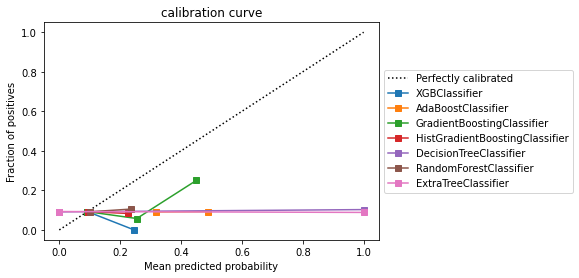

In [ ]:
# untuk model 1
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    ax = plt.gca() 
    CalibrationDisplay.from_estimator(i, x_val_1, y_val,ax=ax)

plt.title("calibration curve")
plt.legend(loc="center left",bbox_to_anchor=[1, 0.5]) 
plt.show()

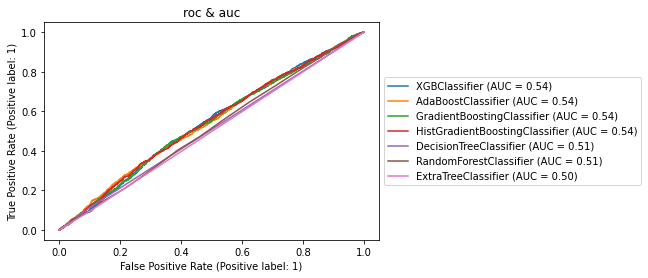

In [ ]:
# untuk model 1
for i in [XGB,ADA,GBT,HGBT,DT,RF,EXT]:
    ax = plt.gca() 
    plot_roc_curve(i, x_val_1, y_val,ax=ax)

plt.title("roc & auc")
plt.legend(loc="center left",bbox_to_anchor=[1, 0.5]) 
plt.show()

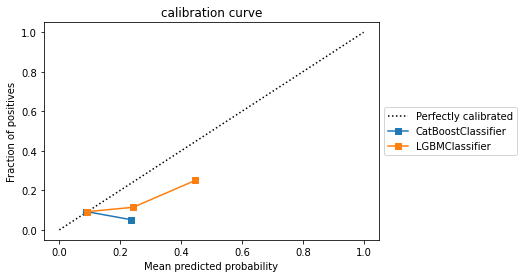

In [ ]:
# untuk model 2
for i in [CB,LGBM]:
    ax = plt.gca() 
    CalibrationDisplay.from_estimator(i, x_val_2, y_val,ax=ax)

plt.title("calibration curve")
plt.legend(loc="center left",bbox_to_anchor=[1, 0.5]) 
plt.show()

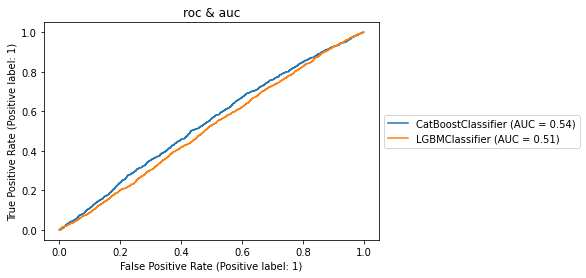

In [ ]:
# untuk model 2
for i in [CB,LGBM]:
    ax = plt.gca() 
    plot_roc_curve(i, x_val_2, y_val,ax=ax)

plt.title("roc & auc")
plt.legend(loc="center left",bbox_to_anchor=[1, 0.5]) 
plt.show()

## Hyper parameters tuning

In [ ]:

#xgboost

def objective(trial):
    
    params = {
       #  "tree_method": trial.suggest_categorical("tree_method",["gpu_hist"]), #untuk gpu
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),       
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_categorical("n_estimators",[10000]),
        "gamma": trial.suggest_int("gamma", 0,5), 
        "eta": trial.suggest_loguniform("eta",1e-3,0.1),
        "reg_alpha": trial.suggest_int("reg_alpha",1,50),
        "reg_lambda": trial.suggest_int("reg_lambda",5,100),
        "max_depth": trial.suggest_int("max_depth",1,10),
    }
    model = XGBClassifier(**params)      
    model.fit(x_train_1,y_train,eval_set=[(x_val_1,y_val)],verbose=False,early_stopping_rounds=100)

    y_preds = model.predict_proba(x_val_1)   
    loss = log_loss(y_val, y_preds)

    return loss

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2021-12-11 12:28:13,274] A new study created in memory with name: no-name-1cf358bc-a39f-44c9-a733-2e9091552976
[I 2021-12-11 12:28:44,630] Trial 0 finished with value: 0.3077322446460863 and parameters: {'lambda': 0.34354055864530114, 'alpha': 1.3842454591941975, 'colsample_bytree': 1.0, 'subsample': 1.0, 'min_child_weight': 96, 'n_estimators': 10000, 'gamma': 1, 'eta': 0.02750547436186328, 'reg_alpha': 3, 'reg_lambda': 5, 'max_depth': 6}. Best is trial 0 with value: 0.3077322446460863.
[I 2021-12-11 12:29:11,512] Trial 1 finished with value: 0.3081936929920212 and parameters: {'lambda': 5.253933649725803, 'alpha': 1.798162229286934, 'colsample_bytree': 0.5, 'subsample': 0.6, 'min_child_weight': 33, 'n_estimators': 10000, 'gamma': 2, 'eta': 0.026720312462006842, 'reg_alpha': 29, 'reg_lambda': 29, 'max_depth': 10}. Best is trial 0 with value: 0.3077322446460863.
[I 2021-12-11 12:29:33,680] Trial 2 finished with value: 0.3082667858442207 and parameters: {'lambda': 0.32804042663314553,

In [ ]:
xgb_params = study.best_trial.params
xgb_params

{'alpha': 0.02176010019712059,
 'colsample_bytree': 0.9,
 'eta': 0.020571315189964308,
 'gamma': 0,
 'lambda': 0.10846952093785264,
 'max_depth': 2,
 'min_child_weight': 127,
 'n_estimators': 10000,
 'reg_alpha': 34,
 'reg_lambda': 71,
 'subsample': 0.7}

## Cross validation

In [ ]:
# Cross validation for xgboost

def cross_val(X, y,model, params, folds=7):

    score = []
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=1000)

        #predict validation
        pred = alg.predict_proba(x_test)
        loss = log_loss(y_test, pred)
        score.append(loss)
        
        print(f" log_loss: {loss}")
        print("-"*50)
     
    print("\nmean Log_loss:",np.array(score).mean())

    return alg

In [ ]:
x_new = pd.concat([x_train_1, x_val_1]) 
y_new = pd.concat([y_train, y_val])

In [ ]:
score_xg = cross_val(x_new, y_new, XGBClassifier, xgb_params)

Fold: 1
 log_loss: 0.6308178491032354
--------------------------------------------------
Fold: 2
 log_loss: 0.6304858991109773
--------------------------------------------------
Fold: 3
 log_loss: 0.6306805858896045
--------------------------------------------------
Fold: 4
 log_loss: 0.6306915477762383
--------------------------------------------------
Fold: 5
 log_loss: 0.630661881030614
--------------------------------------------------
Fold: 6
 log_loss: 0.6306583685499881
--------------------------------------------------
Fold: 7
 log_loss: 0.630679881695186
--------------------------------------------------

mean Log_loss: 0.6306680018794063


In [ ]:
log_loss(y_val,score_xg.predict_proba(x_val_1))

0.6306857259430967

In [ ]:
## buat submission

In [ ]:
test

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,Other,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,135,24,475442,4364
1,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,56,1,72412,2573
2,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,3,26,284825,19676
3,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,Debt consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,21,32,40842,7226
4,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,104,33,90825,26145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,35000,35000,35000.000000,60,BAT5629144,16.240000,C,C5,MORTGAGE,360000.00000,Verified,Credit card refinancing,7.310000,0,0,8,1,83274,72.200000,16,f,10116.330000,0.000000,0.000000,0.000000,0,109,0,883984,114000
28909,25000,25000,25000.000000,60,BAT5629144,14.980000,C,C3,MORTGAGE,105000.00000,Source Verified,Debt consolidation,10.220000,0,1,10,0,26356,50.900000,26,f,6493.950000,0.000000,0.000000,0.000000,0,104,0,513925,51800
28910,30000,30000,29950.000000,60,BAT2136391,18.240000,D,D5,MORTGAGE,74100.00000,Verified,Debt consolidation,27.300000,0,0,19,0,31303,47.700000,45,f,7785.190000,0.000000,0.000000,0.000000,1,83,0,296294,65600
28911,25000,25000,24950.000000,60,BAT2136391,15.610000,D,D1,MORTGAGE,130000.00000,Verified,Debt consolidation,27.290000,2,0,12,0,25470,83.800000,34,f,5513.520000,0.000000,0.000000,0.000000,0,83,0,428723,30400


In [ ]:
# label encoder

for i in cater: 
    test[i] = lc[i].transform(test[i])

In [ ]:

#predict test
y_predict = HGBT.predict(test)

In [ ]:
df = pd.DataFrame({"Loan Status": y_predict})

In [ ]:
df.to_csv("Loan_4.csv", index=False)